In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path
import re
import requests
from io import StringIO
import random
import pdb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload trips data

hogar_21 = pd.read_excel('/content/drive/MyDrive/Code/Data/Microdatos_Hogares_EM2021.xlsx', sheet_name = 'HOGAR')
individuo_21 = pd.read_excel('/content/drive/MyDrive/Code/Data/Microdatos_Hogares_EM2021.xlsx', sheet_name = 'INDIVIDUO')
trips_21 = pd.read_excel('/content/drive/MyDrive/Code/Data/Microdatos_Hogares_EM2021.xlsx', sheet_name = 'DESPLAZAMIENTOS')

hogar_16 = pd.read_excel('/content/drive/MyDrive/Code/Data/Microdatos_Hogares_EM2016.xlsx', sheet_name = 'HOGAR')
individuo_16 = pd.read_excel('/content/drive/MyDrive/Code/Data/Microdatos_Hogares_EM2016.xlsx', sheet_name = 'INDIVIDUO')
trips_16 = pd.read_excel('/content/drive/MyDrive/Code/Data/Microdatos_Hogares_EM2016.xlsx', sheet_name = 'DESPLAZAMIENTOS')

hogar_11 = pd.read_excel('/content/drive/MyDrive/Code/Data/BD_movilidad_EM2011residentes.xlsx', sheet_name = 'E_Hogares')
individuo_11 = pd.read_excel('/content/drive/MyDrive/Code/Data/BD_movilidad_EM2011residentes.xlsx', sheet_name = 'E_Personas')
trips_11 = pd.read_excel('/content/drive/MyDrive/Code/Data/BD_movilidad_EM2011residentes.xlsx', sheet_name = 'E_Desplazamientos')

# Fix differences between years: "HOGAR", "INDIVIDUOS" and "DESPLAZAMIENTOS"

"HOGAR"

In [ ]:
# En 2011, los municipios estan de la siguiente manera: 01 002 en vez de 01002.
hogar_11['Municipio'] = hogar_11['Municipio'].apply(lambda x: "".join(x.split()))
hogar_11['Municipio'] = pd.to_numeric(hogar_11['Municipio'], errors='coerce', downcast='integer')

# En 2016, las capitales no estan incluidas en las comarcas

hogar_16['Comarca'] = hogar_16['Comarca'].replace({21: 2, 22: 8, 23: 17})

# En 2011, hay dos comarcas de mas que no son Euskadi. Pero no hay ningún hogar de ahí así que no hay que hacer nada.

"PERSONAS"

In [ ]:
# En 2016 y 2011, el sexo mujer tiene 6 en vez de 2
individuo_16['Sexo'] = individuo_16['Sexo'].replace({6: 2})
individuo_11['Sexo'] = individuo_11['Sexo'].replace({6: 2})

# En 2021 hay una categoria de edad 0: 0-6 años. Hay individuos en esa categoria, pero no hacen ningun desplazamiento. No hacemos nada.

# En 2016 y 2011, el No de posesion de carnet de turismo, moto y otros viene con un 6 y no un 2.
individuo_16['crnt_tur'] = individuo_16['crnt_tur'].replace({6: 2})
individuo_11['crnt_tur'] = individuo_11['crnt_tur'].replace({6: 2})

individuo_16['crnt_mot'] = individuo_16['crnt_mot'].replace({6: 2})
individuo_11['crnt_mot'] = individuo_11['crnt_mot'].replace({6: 2})

individuo_16['crnt_otr'] = individuo_16['crnt_otr'].replace({6: 2})
individuo_11['crnt_otr'] = individuo_11['crnt_otr'].replace({6: 2})

# El no desplazamiento de un individuo está con un 6 y no un 2.
individuo_16['desplaz'] = individuo_16['desplaz'].replace({6: 2})
individuo_11['desplaz'] = individuo_11['desplaz'].replace({6: 2})

# Hay algunos individuos en las tres encuestas que no sirven de nada porque no de desplazan, o menos de 5 mins o no aplica, y no estan en la lista de los desplazamientos.

"DESPLAZAMIENTOS"

In [ ]:
# 2021

# Drop rows that have NaN un Com_Ori of 1021
trips_21 = trips_21.dropna(subset=['Com_Ori'])

# Change them into int
trips_21['Com_Ori'] = trips_21['Com_Ori'].astype(int)
trips_21['Mun_Ori'] = trips_21['Mun_Ori'].astype(int)

# Hay 4 filas con un 7 como variable de peaje que no se sabe qué es. Se borran
trips_21 = trips_21[trips_21['Peaje'] != 7]


<ipython-input-6-6f2c8fafdd17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_21['Com_Ori'] = trips_21['Com_Ori'].astype(int)
<ipython-input-6-6f2c8fafdd17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_21['Mun_Ori'] = trips_21['Mun_Ori'].astype(int)


In [ ]:
# 2016

# En 2016 y 2011 hay un vacio en Bill y Park que significan que no aplica.
trips_16['Bill'] = trips_16['Bill'].replace({' ': 9})
trips_16['Park'] = trips_16['Park'].replace({' ': 9})
trips_16['Peaje'] = trips_16['Peaje'].replace({' ': 9})

# 2011
trips_11['Bill'].fillna(9, inplace=True)
trips_11['Park'].fillna(9, inplace=True)
trips_11['Peaje'].fillna(9, inplace=True)

trips_11['Bill'] = trips_11['Bill'].astype(int)
trips_11['Park'] = trips_11['Park'].astype(int)

In [ ]:
# Comarcas origen y destino del 2016

trips_16['Com_Ori'] = trips_16['Com_Ori'].replace({21: 2, 22: 8, 23: 17})
trips_16['Com_Dest'] = trips_16['Com_Dest'].replace({21: 2, 22: 8, 23: 17})

# Municipio origen y destino de 2011
trips_11['Mun_Ori'] = trips_11['Mun_Ori'].apply(lambda x: "".join(x.split()))
trips_11['Mun_Des'] = trips_11['Mun_Des'].apply(lambda x: "".join(x.split()))
trips_11['Mun_Ori'] = pd.to_numeric(trips_11['Mun_Ori'], errors='coerce', downcast='integer')
trips_11['Mun_Des'] = pd.to_numeric(trips_11['Mun_Des'], errors='coerce', downcast='integer')

# En 2011 no hay como Actividad origen y destino 12:Médico por lo que Otros hay que retrasarlo.
# Además, hay que quitarles el 0 a los numeros.

trips_11['Act_Ori'] = trips_11['Act_Ori'].replace({12: 13})
trips_11['Act_Des'] = trips_11['Act_Des'].replace({12: 13})

# En 2016, el "Otros" del proposito del viaje esta con P7 en vez de P6 como en 2021. Para ello tengo que eliminar las filas de P6 primero, que es NC. No sirven de nada.
trips_16 = trips_16[trips_16['Cod_Prop'] != "P6"]
trips_16['Cod_Prop'] = trips_16['Cod_Prop'].replace({"P7": "P6"})

# En 2011, todos los codigos estan cambiados y ademas hay más.

trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({1: "P5"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({2: "P2"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({3: "P1"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({4: "P1"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({5: "P3"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({6: "P3"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({7: "P4"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({8: "P6"})
trips_11['Cod_Prop'] = trips_11['Cod_Prop'].replace({9: "P6"})

# En 2011, en el modo de desplazamiento, hay un modo que es FEVE. Sera algun metro, pero todo ocurre en Bizkaia así que lo elimino.
trips_16 = trips_16[trips_16['Cod_Modo'] != 22]
trips_11['Cod_Modo'] = trips_11['Cod_Modo'].replace({23: 22, 24: 23, 25: 24})

# El grado de recurrencia en 2011 no tiene nada que ver con las otras dos. No se puede hacer ninguna modificacion.

# En 2021 hay dos tipos de "Bill" que no estan en las otras dos encuestas: NS/Nc y No aplica.

# En 2016 y 2011, los parkings tiene diferente numeracion
trips_16['Park'] = trips_16['Park'].replace({3: 2})
trips_16['Park'] = trips_16['Park'].replace({5: 3})
trips_16['Park'] = trips_16['Park'].replace({6: 4})
trips_16['Park'] = trips_16['Park'].replace({7: 5})

trips_11['Park'] = trips_11['Park'].replace({3: 2})
trips_11['Park'] = trips_11['Park'].replace({5: 3})
trips_11['Park'] = trips_11['Park'].replace({6: 4})
trips_11['Park'] = trips_11['Park'].replace({7: 5})

# En 2016 y 2011 el Sí al uso de peaje esta con un 6 y no un 2.
trips_16['Peaje'] = trips_16['Peaje'].replace({6: 2})

# En 2016 hay un vacio que significa que no aplica. Lo cambiamos por un 9 como en 2021.
# Tambien hay un 0 que no sé lo que significa. Le voy a poner como que no hay peaje, PERO EN VERDAD NO SÉ.
trips_16['Peaje'] = trips_16['Peaje'].replace({0: 1})

# En 2011 hay un vació en Peaje que es lo mismo
# El SÍ lo sustituyo por un 2 y el NO por un 1
trips_11['Peaje'] = trips_11['Peaje'].replace({'SI': 2})
trips_11['Peaje'] = trips_11['Peaje'].replace({'NO': 1})

<ipython-input-8-c5bdf9c78a73>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_16['Park'] = trips_16['Park'].replace({3: 2})
<ipython-input-8-c5bdf9c78a73>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_16['Park'] = trips_16['Park'].replace({5: 3})
<ipython-input-8-c5bdf9c78a73>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

# Juntar HOGAR Y PERSONA, to add HH type

In [ ]:
# Se puede mejorar jugando con parados y estudiantes

people_11 = pd.merge(individuo_11, hogar_11, on='ID_Hogar', how='left')
people_16 = pd.merge(individuo_16, hogar_16, on='ID_Hogar', how='left')
people_21 = pd.merge(individuo_21, hogar_21, on='ID_Hogar', how='left')

people_11['Tipo_familia'] = ''
people_16['Tipo_familia'] = ''
people_21['Tipo_familia'] = ''

def anadir_tipo_familia(df, lista_ID_Hogar):
  valor_estudiante = [4]
  for id in lista_ID_Hogar:
    m = df[df['ID_Hogar'] == id]
    per_hog = m["Per_hog"].iloc[0]
    conteo = m['Actividad'].isin(valor_estudiante).sum()
    if len(m) == conteo: # todos estudiantes
      df.loc[m.index, 'Tipo_familia'] = 'All students'
    if per_hog == 1:
      if len(m) == 1:
        df.loc[m.index, 'Tipo_familia'] = 'Hogar de una persona'
      else:
        conteo = m['Actividad'].isin(valor_estudiante).sum() # Cuenta el numero de estudiantes
        if conteo == 0:
          df.loc[m.index, 'Tipo_familia'] = '2 adultos'
        else:
          df.loc[m.index, 'Tipo_familia'] = '1 adulto con niño(s)'
    elif per_hog == 2:
      if len(m) == 3:
        conteo = m['Actividad'].isin(valor_estudiante).sum()
        if conteo == 2:
          df.loc[m.index, 'Tipo_familia'] = '1 adulto con niño(s)'
        elif conteo == 1:
          df.loc[m.index, 'Tipo_familia'] = '2 adultos con niño(s)'
        elif conteo == 0:
          df.loc[m.index, 'Tipo_familia'] = 'Otros hogares sin niños'
      elif len(m) == 4:
        conteo = m['Actividad'].isin(valor_estudiante).sum()
        if conteo == 3:
          df.loc[m.index, 'Tipo_familia'] = '1 adulto con niño(s)'
        elif conteo == 2:
          df.loc[m.index, 'Tipo_familia'] = '2 adultos con niño(s)'
        elif conteo == 1:
          df.loc[m.index, 'Tipo_familia'] = 'Otros hogares con niños'
        elif conteo == 0:
          df.loc[m.index, 'Tipo_familia'] = 'Otros hogares sin niños'
      elif len(m) == 5:
        conteo = m['Actividad'].isin(valor_estudiante).sum()
        if conteo == 4:
          df.loc[m.index, 'Tipo_familia'] = '1 adulto con niño(s)'
        elif conteo == 3:
          df.loc[m.index, 'Tipo_familia'] = '2 adultos con niño(s)'
        elif conteo == 0:
          df.loc[m.index, 'Tipo_familia'] = 'Otros hogares sin niños'
        else:
          df.loc[m.index, 'Tipo_familia'] = 'Otros hogares con niños'
    else: # Per_hog == 3
      conteo = m['Actividad'].isin(valor_estudiante).sum()
      if (len(m)-conteo) == 1:
        df.loc[m.index, 'Tipo_familia'] = '1 adulto con niño(s)'
      elif (len(m)-conteo) == 2:
        df.loc[m.index, 'Tipo_familia'] = '2 adultos con niño(s)'
      elif conteo == 0:
        df.loc[m.index, 'Tipo_familia'] = 'Otros hogares sin niños'
      else:
        df.loc[m.index, 'Tipo_familia'] = 'Otros hogares con niños'

anadir_tipo_familia(people_11, people_11['ID_Hogar'].unique())
anadir_tipo_familia(people_16, people_16['ID_Hogar'].unique())
anadir_tipo_familia(people_21, people_21['ID_Hogar'].unique())

In [ ]:
# To  each trip, I assign its trip-taker and HH characteristics using merge

trips_21 = pd.merge(trips_21, people_21, on='ID_Pers', how='left')
trips_21 = trips_21.drop(columns='ID_Hogar_y')
trips_21 = trips_21.rename(columns={'ID_Hogar_x': 'ID_Hogar'})

trips_16 = pd.merge(trips_16, people_16, on='ID_Pers', how='left')
trips_16 = trips_16.drop(columns='ID_Hogar_y')
trips_16 = trips_16.rename(columns={'ID_Hogar_x': 'ID_Hogar'})

trips_11 = pd.merge(trips_11, people_11, on='ID_Pers', how='left')
trips_11 = trips_11.drop(columns='ID_Hogar_y')
trips_11 = trips_11.rename(columns={'ID_Hogar_x': 'ID_Hogar'})

In [ ]:
# Voy a eliminar los trips que no tienen ni origen ni destino en Gipuzkoa

trips_21 = trips_21[(trips_21['Prov_Ori'] == 20) | (trips_21['Prov_Des'] == 20)]
trips_16 = trips_16[(trips_16['Prov_Ori'] == 20) | (trips_16['Prov_Des'] == 20)]
trips_11 = trips_11[(trips_11['Prov_Ori'] == 20) | (trips_11['Prov_Des'] == 20)]

# Elimino también los que no tienen como destino o como origen españa, esto es, los que vienen o se van fuera de España

trips_21 = trips_21[(trips_21['Pais_Ori'] == 108) & (trips_21['Pais_Ori'] == 108)]
trips_16 = trips_16[(trips_16['Pais_Ori'] == 108) & (trips_16['Pais_Ori'] == 108)]
trips_11 = trips_11[(trips_11['Pais_Ori'] == 108) & (trips_11['Pais_Ori'] == 108)]

# Elimino columnas innecesarias: Pais origen y destino, desplaz,

trips_21.rename(columns={'N_viaje': 'N_Viaje'}, inplace=True)

trips_21 = trips_21.drop(columns=['Pais_Ori', 'Pais_Des', 'desplaz', 'ID_Desp', 'N_Viaje'])
trips_16 = trips_16.drop(columns=['Pais_Ori', 'Pais_Des', 'desplaz', 'ID_Desp', 'N_Viaje'])
trips_11 = trips_11.drop(columns=['Pais_Ori', 'Pais_Des', 'desplaz', 'ID_Desp', 'N_Viaje'])

# Reset indexes

trips_21 = trips_21.reset_index()
trips_21 = trips_21.drop(columns='index')
trips_16 = trips_16.reset_index()
trips_16 = trips_16.drop(columns='index')
trips_11 = trips_11.reset_index()
trips_11 = trips_11.drop(columns='index')

# Eliminar dos columnas de 2011

trips_11 = trips_11.drop(columns=['O_TP', 'TP_D'])

In [ ]:
trips_11['Recur'] = trips_11['Recur'].replace({0: 99})

def mapear_valor(valor):
    if 1 <= valor <= 2:
        return 21
    elif 3 <= valor <= 5:
        return 22
    elif 6 <= valor <= 10:
        return 23
    elif 11 <= valor <= 15:
        return 24
    elif valor != 99:
      return 25
    else:
        return valor  # Si no cumple con ninguna condición, mantener el valor original

# Aplica la función a la columna 'tu_columna' utilizando apply
trips_11['Recur'] = trips_11['Recur'].apply(mapear_valor)

In [ ]:
# Juntar los tres datasets, pero agregando una columna del año al que pertenecen para identificarlos

trips_21['Año'] = 2021
trips_16['Año'] = 2016
trips_11['Año'] = 2011

trips = pd.concat([trips_21, trips_16, trips_11], ignore_index=True)
trips

,ID_Hogar,ID_Pers,Prov_Ori,Com_Ori,Mun_Ori,Act_Ori,Prov_Des,Com_Dest,Mun_Des,Act_Des,...,crnt_mot,crnt_otr,Provincia,Municipio,Comarca,Per_hog,Turismos,Motos,Tipo_familia,Año
0,8,19,20,17,20069,2,20,17,20069,5,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
1,8,19,20,17,20069,5,20,17,20069,8,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
2,8,19,20,17,20069,8,20,17,20069,2,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
3,8,19,1,2,1999,1,20,17,20069,2,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
4,20,47,20,16,20999,5,1,2,1999,1,...,2,2,1,1999,2,2,4,1,2 adultos con niño(s),2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30614,41164,411641,20,18,20999,3,20,18,20999,1,...,2,2,20,20999,18,1,2,1,Hogar de una persona,2011
30615,41898,418981,20,18,20080,1,20,18,20080,3,...,2,2,20,20080,18,1,2,1,2 adultos,2011
30616,41898,418981,20,18,20080,3,20,18,20080,1,...,2,2,20,20080,18,1,2,1,2 adultos,2011
30617,41898,418982,20,18,20080,1,20,18,20080,7,...,2,2,20,20080,18,1,2,1,2 adultos,2011


In [ ]:
# Elimino las filas de trips que tienen NaN en alguno de los valores importantes
# 20 filas para Com_Ori y las mismas 20 para Mun_Ori
# prueba = trips[trips['Mun_Ori'].isna()]
# prueba

trips = trips.dropna(subset=['Com_Ori'])

In [ ]:
# Change float values to int values

trips['Com_Ori'] = trips['Com_Ori'].apply(lambda x: int(x) if isinstance(x, float) else x)
trips['Mun_Ori'] = trips['Mun_Ori'].apply(lambda x: int(x) if isinstance(x, float) else x)
trips['Dur_Tot'] = trips['Dur_Tot'].apply(lambda x: int(x) if isinstance(x, float) else x)
trips['elev'] = trips['elev'].apply(lambda x: int(x) if isinstance(x, float) else x)
trips = trips.reset_index()
trips = trips.drop(columns='index')
trips

,ID_Hogar,ID_Pers,Prov_Ori,Com_Ori,Mun_Ori,Act_Ori,Prov_Des,Com_Dest,Mun_Des,Act_Des,...,crnt_mot,crnt_otr,Provincia,Municipio,Comarca,Per_hog,Turismos,Motos,Tipo_familia,Año
0,8,19,20,17,20069,2,20,17,20069,5,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
1,8,19,20,17,20069,5,20,17,20069,8,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
2,8,19,20,17,20069,8,20,17,20069,2,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
3,8,19,1,2,1999,1,20,17,20069,2,...,2,2,1,1999,2,2,2,1,2 adultos con niño(s),2021
4,20,47,20,16,20999,5,1,2,1999,1,...,2,2,1,1999,2,2,4,1,2 adultos con niño(s),2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30614,41164,411641,20,18,20999,3,20,18,20999,1,...,2,2,20,20999,18,1,2,1,Hogar de una persona,2011
30615,41898,418981,20,18,20080,1,20,18,20080,3,...,2,2,20,20080,18,1,2,1,2 adultos,2011
30616,41898,418981,20,18,20080,3,20,18,20080,1,...,2,2,20,20080,18,1,2,1,2 adultos,2011
30617,41898,418982,20,18,20080,1,20,18,20080,7,...,2,2,20,20080,18,1,2,1,2 adultos,2011


In [ ]:
trips.to_csv('/content/drive/MyDrive/Code/Results/trips.csv')

In [ ]:
trips = pd.read_csv('/content/drive/MyDrive/Code/Results/trips.csv',index_col=0)

## Asigno nombre a las variables que me interesan.
Prov_Ori y Prov_Des
Com_Ori y Com_Dest
Mun_Ori y Mun_Des
Cod_Modo

In [ ]:
# Bring the codes
comarcas = pd.read_excel('/content/drive/MyDrive/Code/Data/Codigos.xlsx', sheet_name = 'Comarcas')
municipios = pd.read_excel('/content/drive/MyDrive/Code/Data/Codigos.xlsx', sheet_name = 'Municipios')
actividades = pd.read_excel('/content/drive/MyDrive/Code/Data/Codigos.xlsx', sheet_name = 'Actividades')
propositos = pd.read_excel('/content/drive/MyDrive/Code/Data/Codigos.xlsx', sheet_name = 'Propositos')
modos = pd.read_excel('/content/drive/MyDrive/Code/Data/Codigos.xlsx', sheet_name = 'Modos')

In [ ]:
# Comarcas

trips = pd.merge(trips, comarcas, left_on='Comarca', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Comarca'])
trips = trips.rename(columns={'Comarcas': 'Comarca'})

trips = pd.merge(trips, comarcas, left_on='Com_Ori', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Com_Ori'])
trips = trips.rename(columns={'Comarcas': 'Com_Ori'})

trips = pd.merge(trips, comarcas, left_on='Com_Dest', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Com_Dest'])
trips = trips.rename(columns={'Comarcas': 'Com_Des'})

# Municipios

trips = pd.merge(trips, municipios, left_on='Municipio', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Municipio'])
trips = trips.rename(columns={'Municipios': 'Municipio'})

trips = pd.merge(trips, municipios, left_on='Mun_Ori', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Mun_Ori'])
trips = trips.rename(columns={'Municipios': 'Mun_Ori'})

trips = pd.merge(trips, municipios, left_on='Mun_Des', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Mun_Des'])
trips = trips.rename(columns={'Municipios': 'Mun_Des'})

# Actividades

trips = pd.merge(trips, actividades, left_on='Act_Ori', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Act_Ori'])
trips = trips.rename(columns={'Actividades': 'Act_Ori'})

trips = pd.merge(trips, actividades, left_on='Act_Des', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Act_Des'])
trips = trips.rename(columns={'Actividades': 'Act_Des'})

# Propositos

trips = pd.merge(trips, propositos, left_on='Cod_Prop', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Cod_Prop'])
trips = trips.rename(columns={'Propositos': 'Proposito'})

# Modos

trips = pd.merge(trips, modos, left_on='Cod_Modo', right_on='Codigo', how='left')
trips = trips.drop(columns=['Codigo', 'Cod_Modo'])
trips = trips.rename(columns={'Modos': 'Modo'})


In [ ]:
# Ordeno el dataframe

trips = trips[['Prov_Ori', 'Prov_Des', 'Com_Ori', 'Com_Des', 'Mun_Ori', 'Mun_Des', 'Act_Ori',
        'Act_Des', 'Proposito', 'N_Etapas', 'Modo', 'Hora_Ini',
       'Dur_Tot', 'Recur', 'Bill', 'Park', 'Peaje', 'elev', 'Provincia',
       'Municipio', 'Comarca', 'Per_hog', 'Turismos', 'Motos', 'Tipo_familia', 'Sexo', 'Edad',
       'Actividad', 'crnt_tur', 'crnt_mot', 'crnt_otr', 'Año']]

In [ ]:
# Elimino las columnas que considero innecesarias
# Elimino N_Etapas (300 filas, 100 de 2021), porque todos los modos son intermodal. ??

trips = trips[trips['N_Etapas'] == 1]

eliminar = ['N_Etapas']
trips = trips.drop(columns=eliminar)
trips = trips.reset_index(drop=True)
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Turismos,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año
0,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
1,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
2,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
3,20,1,Debagoiena,Arabako Lautada/Llanada Alavesa,Resto Gipuzkoa,Resto Alava/Araba,Centro estudios,Residencia Habitual,Estudio,Coche conductor,...,4,1,2 adultos con niño(s),2,3,4,1,2,2,2021
4,1,20,Arabako Lautada/Llanada Alavesa,Debagoiena,Resto Alava/Araba,Resto Gipuzkoa,Residencia Habitual,Centro estudios,Estudio,Coche conductor,...,4,1,2 adultos con niño(s),2,3,4,1,2,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30309,20,20,Goierri,Goierri,Resto Gipuzkoa,Resto Gipuzkoa,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,Hogar de una persona,1,5,1,1,2,2,2011
30310,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
30311,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
30312,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,2,1,2 adultos,2,5,6,2,2,2,2011


In [ ]:
# Me quedo solo con trips dentro de gipuzkoa, representan 28400 filas de 30300.
# Lo hago porque añadir el tiempo en TP no lo puedo hacer desde Bilbao, porque no tengo la red cargada, y si la cargo sería como incluir ya Vizcaya en el estudio. Hacerlo en un futuro a través de Eibar.
# Y para el coche y andar lo mismo, tendría que añadir una red, pero ya aumenta mucho el problema, hay que acotarlo.

trips = trips[trips['Prov_Ori'] == 20]
trips = trips[trips['Prov_Des'] == 20]
trips = trips.reset_index(drop=True)
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Turismos,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año
0,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
1,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
2,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
3,20,20,Donostialdea,Goierri,Donostia/SanSebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,1,2021
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/SanSebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28392,20,20,Goierri,Goierri,Resto Gipuzkoa,Resto Gipuzkoa,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,Hogar de una persona,1,5,1,1,2,2,2011
28393,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
28394,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
28395,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,2,1,2 adultos,2,5,6,2,2,2,2011


In [ ]:
# Voy a eliminar las filas que tienen como Mun_Ori o Mun_Des "Resto de Gipuzkoa", aunque en un futuro con la comarca se podría hacer algo...
# Me cargo 6200 filas

trips = trips[trips['Mun_Ori'] != 'Resto Gipuzkoa']
trips = trips[trips['Mun_Des'] != 'Resto Gipuzkoa']
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Turismos,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año
0,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
1,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
2,20,20,Donostialdea,Donostialdea,Donostia/SanSebastian,Donostia/SanSebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
3,20,20,Donostialdea,Goierri,Donostia/SanSebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,1,2021
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/SanSebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28386,20,20,Donostialdea,Donostialdea,Hernani,Hernani,Gestiones personales,Residencia Habitual,Gestiones Personales,Coche conductor,...,2,1,Hogar de una persona,1,6,3,1,2,2,2011
28393,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
28394,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
28395,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,2,1,2 adultos,2,5,6,2,2,2,2011


In [ ]:
trips = trips.replace("Donostia/SanSebastian", "Donostia/San Sebastian")

In [ ]:
# Modificaciones a la columna Hora_Ini para dejarla bien

trips['Hora_Ini'] = trips['Hora_Ini'].astype(str)

# Definir una función para convertir el formato de tiempo
def convertir_a_formato_deseado(tiempo):
    partes = tiempo.split(':')
    if len(partes) == 3:
        # Si hay segundos, convertir a "HH:MM"
        return ':'.join(partes[:2])
    else:
        # Si ya está en "HH:MM", mantenerlo igual
        return tiempo

# Aplicar la función a la columna 'Tiempo'
trips['Hora_Ini'] = trips['Hora_Ini'].apply(convertir_a_formato_deseado)

# Pongo el 0 delante de 7:20, por ejemplo
trips['Hora_Ini'] = trips['Hora_Ini'].astype(str).str.zfill(5)

# Tengo dos filas raras, las voy a modificar. Una facil, cambio 1900-01-02 17:00 por 17:00. Y luego para los 00nan, elimino una persona, y para la otra me invento que es a las 17:00.
trips['Hora_Ini'] = trips['Hora_Ini'].replace('1900-01-02 17:00', '17:00')
# trips = trips[trips['ID_Pers'] != 7009]
trips = trips[trips['Hora_Ini'] != '00nan']

trips = trips.reset_index(drop=True)
# trips['Hora_Ini'] = trips['Hora_Ini'].replace('00nan', '17:00')

# Define la función de redondeo
def redondear_hora_abajo(hora_str):
    partes = hora_str.split(':')
    hora = int(partes[0])
    minutos = int(partes[1])

    minutos_redondeados = minutos // 5 * 5
    if minutos_redondeados == 60:
        hora += 1
        minutos_redondeados = 0

    hora_redondeada = f"{hora:02d}:{minutos_redondeados:02d}"
    return hora_redondeada

# Aplica la función de redondeo a la columna "hora"
trips['Hora_Ini'] = trips['Hora_Ini'].apply(redondear_hora_abajo)
trips['Hora_Ini'].unique()
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Turismos,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
1,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
2,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
3,20,20,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,1,2021
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22112,20,20,Donostialdea,Donostialdea,Hernani,Hernani,Gestiones personales,Residencia Habitual,Gestiones Personales,Coche conductor,...,2,1,Hogar de una persona,1,6,3,1,2,2,2011
22113,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
22114,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
22115,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,2,1,2 adultos,2,5,6,2,2,2,2011


In [ ]:
# Elimino las filas que tienen NaN o NS/NC como pueblos origen o destino (no cambia mucho porque eran pocas filas)

pueblos = ['Donostia/San Sebastian', 'Arrasate/Mondragon', 'Urnieta',
       'Andoain', 'Zarautz', 'Beasain', 'Hernani', 'Irun', 'Usurbil',
       'Villabona', 'Lasarte-Oria', 'Hondarribia', 'Tolosa',
       'Aretxabaleta', 'Bergara', 'Azkoitia', 'Ordizia', 'Azpeitia',
       'Elgoibar', 'Zumaia', 'Orio', 'Zumarraga', 'Lazkao', 'Legazpi',
       'Oñati', 'Deba', 'Eibar', 'Urretxu', 'Errenteria', 'Lezo',
       'Oiartzun', 'Pasaia', 'Mutriku']

trips = trips[trips['Mun_Ori'].isin(pueblos)]
trips = trips[trips['Mun_Des'].isin(pueblos)]
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Turismos,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
1,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
2,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,1,2 adultos con niño(s),2,2,4,2,2,2,2021
3,20,20,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,1,2021
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,3,1,2 adultos con niño(s),1,5,1,1,2,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22112,20,20,Donostialdea,Donostialdea,Hernani,Hernani,Gestiones personales,Residencia Habitual,Gestiones Personales,Coche conductor,...,2,1,Hogar de una persona,1,6,3,1,2,2,2011
22113,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
22114,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,2,1,2 adultos,1,5,1,1,2,2,2011
22115,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,2,1,2 adultos,2,5,6,2,2,2,2011


In [ ]:
trips.to_csv('/content/drive/MyDrive/Code/Results/trips2.csv')

In [ ]:
trips = pd.read_csv('/content/drive/MyDrive/Code/Results/trips2.csv',index_col=0)

In [ ]:
trips['Mun_Ori'].unique()

array(['Donostia/San Sebastian', 'Arrasate/Mondragon', 'Urnieta',
       'Andoain', 'Zarautz', 'Beasain', 'Hernani', 'Irun', 'Usurbil',
       'Villabona', 'Lasarte-Oria', 'Hondarribia', 'Tolosa',
       'Aretxabaleta', 'Bergara', 'Azkoitia', 'Ordizia', 'Azpeitia',
       'Elgoibar', 'Zumaia', 'Orio', 'Zumarraga', 'Lazkao', 'Legazpi',
       'Oñati', 'Deba', 'Eibar', 'Urretxu', 'Errenteria', 'Lezo',
       'Oiartzun', 'Pasaia', 'Mutriku'], dtype=object)

# Añadir datos sobre income level

In [ ]:
# Income based on munipality
# https://www.eustat.eus/elementos/ele0005700/renta-personal-media-de-la-c-a-de-euskadi-por-ambitos-territoriales-segun-tipo-de-renta-euros/tbl0005790_c.html
income_municipality = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Municipio')
income_municipality

# Income based on age and gender
# https://www.eustat.eus/elementos/ele0002100/renta-personal-media-de-la-ca-de-euskadi-por-sexo-y-edad-quinquenal-segun-tipo-de-renta-euros/tbl0002166_c.html
income_age_man = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Hombres_edad', usecols="D:XFD")
income_age_woman = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Mujeres_edad', usecols="D:XFD")
income_age_man = income_age_man.dropna()
income_age_woman = income_age_woman.dropna()

# Income based on Actividad
# https://www.eustat.eus/elementos/ele0002100/renta-personal-media-por-sexo-y-relacion-con-la-actividad-segun-tipo-de-renta-euros/tbl0002170_c.html
# https://www.eustat.eus/elementos/ele0002900/renta-personal-media-de-poblacion-jubilada-por-tipo-de-renta-segun-territorio-historico-y-sexo-euros/tbl0002942_c.html
income_actividad = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Actividad', usecols="E:XFD")
income_actividad = income_actividad.dropna()

# Income based on number of cars
# Deciles: https://www.eustat.eus/elementos/ele0013700/poblacionde18ymasanos-pordecilderenta-personal-de-la-ca-de-euskadi-segun-territoriohistorico-y-sexo-/tbl0013735_c.html
income_cuartiles = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Cuartiles', usecols="D:XFD")
income_cuartiles = income_cuartiles.dropna()
income_coches = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Probabilidad_coches', usecols="G:XFD")
income_coches = income_coches.dropna()

# Income based on family type
# https://www.ine.es/jaxiT3/Datos.htm?t=10942
# Estos datos los he cogido del INE porque en Eustat hay renta del hogar dependiendo del numero de personas en el hogar, bastante inexacta para mi. Este me gusta más.
income_family_21 = {
    'Tipo_familia': ['Hogar de una persona', '2 adultos', 'Otros hogares sin niños', '1 adulto con niño(s)', '2 adultos con niño(s)', 'Otros hogares con niños', 'All students'],
    'Inc_fam': [16660, 15626, 12917, 7626, 10079, 8935, 0]
}
income_family_21 = pd.DataFrame(income_family_21)
income_family_16 = {
    'Tipo_familia': ['Hogar de una persona', '2 adultos', 'Otros hogares sin niños', '1 adulto con niño(s)', '2 adultos con niño(s)', 'Otros hogares con niños', 'All students'],
    'Inc_fam': [15187, 13264, 10952, 8256, 8956, 7482, 0]
}
income_family_16 = pd.DataFrame(income_family_16)
income_family_11 = {
    'Tipo_familia': ['Hogar de una persona', '2 adultos', 'Otros hogares sin niños', '1 adulto con niño(s)', '2 adultos con niño(s)', 'Otros hogares con niños', 'All students'],
    'Inc_fam': [14989, 13270, 11783, 7434, 9115, 8299, 0]
}
income_family_11 = pd.DataFrame(income_family_11)

# el income de actividad=estudiante y la edad=2 me lo he inventado, pero necesitaba un valor

<ipython-input-27-e280ab1e14f7>:8: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  income_age_man = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Hombres_edad', usecols="D:XFD")
<ipython-input-27-e280ab1e14f7>:9: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  income_age_woman = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Mujeres_edad', usecols="D:XFD")
<ipython-input-27-e280ab1e14f7>:16: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  income_actividad = pd.read_excel('/content/drive/MyDrive/Code/Data/Nivel_adquisitivo/nivel_adquisitivo.xlsx', sheet_name = 'Actividad', usecols="E:XFD")
<ipython-input-27-e280ab1e14f7>:21: FutureWarning: Defin

# Asignar los incomes

In [ ]:
# Municipality
trips = pd.merge(trips, income_municipality, on='Municipio', how='left')
trips['Inc_municipio'] = trips['Inc_municipio'].fillna(23354) # Es el salario medio de los pueblos de Euskadi. Lo hago porque algunos pone "Resto de Gipuzkoa"

# Age and gender
trips = pd.merge(trips, income_age_man, left_on='Edad', right_on='Edad.1', how='left')
trips = pd.merge(trips, income_age_woman, left_on='Edad', right_on='Edad.1', how='left')
trips['Inc_edad'] = np.where(trips['Sexo'] == 1, trips['Inc_edad_man'], trips['Inc_edad_woman'])
trips = trips.drop(columns=['Edad.1_x', 'Edad.1_y', 'Inc_edad_man', 'Inc_edad_woman'])

# Actividad
trips = pd.merge(trips, income_actividad, left_on='Actividad', right_on='Actividad.1', how='left')
trips = trips.drop(columns=['Actividad.1'])
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año,Inc_municipio,Inc_edad,Inc_act
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,2,4,2,2,2,2021,23354.0,5570.700000,5366
1,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,2,4,2,2,2,2021,23354.0,5570.700000,5366
2,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,2,4,2,2,2,2021,23354.0,5570.700000,5366
3,20,20,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,1,5,1,1,2,1,2021,23354.0,35240.333333,28495
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,1,5,1,1,2,2,2021,21819.0,35240.333333,28495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21899,20,20,Donostialdea,Donostialdea,Hernani,Hernani,Gestiones personales,Residencia Habitual,Gestiones Personales,Coche conductor,...,1,6,3,1,2,2,2011,21757.0,32710.000000,19338
21900,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,1,5,1,1,2,2,2011,21626.0,35240.333333,28495
21901,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,1,5,1,1,2,2,2011,21626.0,35240.333333,28495
21902,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,2,5,6,2,2,2,2011,21626.0,23785.666667,5366


In [ ]:
# Tipo de familia

df1 = pd.merge(trips[trips['Año'] == 2021], income_family_21, on='Tipo_familia', how='left')
df2 = pd.merge(trips[trips['Año'] == 2016], income_family_16, on='Tipo_familia', how='left')
df3 = pd.merge(trips[trips['Año'] == 2011], income_family_11, on='Tipo_familia', how='left')
# Imprimir el resultado
trips = pd.concat([df1, df2, df3], ignore_index=True)
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año,Inc_municipio,Inc_edad,Inc_act,Inc_fam
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,2,4,2,2,2,2021,23354.0,5570.700000,5366,10079
1,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,2,4,2,2,2,2021,23354.0,5570.700000,5366,10079
2,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,2,4,2,2,2,2021,23354.0,5570.700000,5366,10079
3,20,20,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,5,1,1,2,1,2021,23354.0,35240.333333,28495,10079
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,5,1,1,2,2,2021,21819.0,35240.333333,28495,10079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21899,20,20,Donostialdea,Donostialdea,Hernani,Hernani,Gestiones personales,Residencia Habitual,Gestiones Personales,Coche conductor,...,6,3,1,2,2,2011,21757.0,32710.000000,19338,14989
21900,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,5,1,1,2,2,2011,21626.0,35240.333333,28495,13270
21901,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,5,1,1,2,2,2011,21626.0,35240.333333,28495,13270
21902,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,5,6,2,2,2,2011,21626.0,23785.666667,5366,13270


In [ ]:
# Turismos
import random
# Función para asignar una columna basada en el número de turismos
def asignar_columna(row):
    numero_turismos = row['Turismos']
    probabilidades = income_coches.loc[income_coches['Num_cars'] == numero_turismos][['Q1.1', 'Q2.1', 'Q3.1', 'Q4.1']].values[0]
    columnas_posibles = ['Q1.1', 'Q2.1', 'Q3.1', 'Q4.1']
    columna_asignada = np.random.choice(columnas_posibles, p=probabilidades / sum(probabilidades))
    return columna_asignada

# Aplicar la función para asignar columnas a cada fila de 'trips'
trips['Cuartil_coche'] = trips.apply(asignar_columna, axis=1)

# Asignar income dependiendo del cuartil
trips = pd.merge(trips, income_cuartiles, left_on='Cuartil_coche', right_on='Cuartil', how='left')
trips = trips.drop(columns=['Cuartil_coche', 'Cuartil'])

In [ ]:
# Income final

trips['Income'] = trips['Inc_act']*0.45 + trips['Inc_car']*0.15 + trips['Inc_edad']*0.15 + trips['Inc_municipio']*0.1 + trips['Inc_fam']*0.15
# If any of the values of income is 0 (kid, student...), write 0 on the final income.
def update_income(row):
    if row['Inc_edad'] < 1 or row['Inc_act'] < 1 or row['Inc_fam'] < 1: # Tendran 0: gente entre 0-19 años. Actividad=estudiante. Inc_fam==all students.
        return 0
    else:
        return row['Income']
# Apply the function to update 'Column4'
trips['Income'] = trips.apply(update_income, axis=1)
trips = trips.drop(columns=['Inc_municipio', 'Inc_edad', 'Inc_act', 'Inc_fam', 'Inc_car'])
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año,Income
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Otra vivienda,Centro estudios,Otros,Autobús urbano,...,1,2 adultos con niño(s),2,2,4,2,2,2,2021,12906.515
1,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Centro estudios,Compras doméstico-familiares,Estudio,Andando,...,1,2 adultos con niño(s),2,2,4,2,2,2,2021,12906.515
2,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Compras doméstico-familiares,Otra vivienda,Compras,Andando,...,1,2 adultos con niño(s),2,2,4,2,2,2,2021,12906.515
3,20,20,Donostialdea,Goierri,Donostia/San Sebastian,Beasain,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,1,2 adultos con niño(s),1,5,1,1,2,1,2021,27765.010
4,20,20,Debagoiena,Donostialdea,Arrasate/Mondragon,Donostia/San Sebastian,Asuntos trabajo,Asuntos trabajo,Trabajo,Coche conductor,...,1,2 adultos con niño(s),1,5,1,1,2,2,2021,25244.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21899,20,20,Donostialdea,Donostialdea,Hernani,Hernani,Gestiones personales,Residencia Habitual,Gestiones Personales,Coche conductor,...,1,Hogar de una persona,1,6,3,1,2,2,2011,23841.610
21900,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,1,2 adultos,1,5,1,1,2,2,2011,28070.860
21901,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Trabajo habitual,Residencia Habitual,Trabajo,Coche conductor,...,1,2 adultos,1,5,1,1,2,2,2011,25703.710
21902,20,20,Goierri,Goierri,Zumarraga,Zumarraga,Residencia Habitual,Compras personales,Compras,Andando,...,1,2 adultos,2,5,6,2,2,2,2011,13577.460


In [ ]:
trips.to_csv('/content/drive/MyDrive/Code/Results/trips2.csv')

In [ ]:
trips = pd.read_csv('/content/drive/MyDrive/Code/Results/trips2.csv',index_col=0)

In [ ]:
# Expandir los trips, hacer que cada trayecto sea una fila

# Crear una lista de filas duplicadas
nuevas_filas = []
for index, row in trips.iterrows():
    valores_columnas = row[trips.columns]
    repeticiones = row['elev']
    nuevas_filas.extend([valores_columnas] * repeticiones)

# Crear un nuevo DataFrame con las filas duplicadas
trips = pd.DataFrame(nuevas_filas, columns=trips.columns)

# Elimino la columna desplazamientos que ya no tiene sentido alguno
trips = trips.drop(columns=["elev"])

# Mezclo las filas de manera aleatoria
trips = trips.sample(frac=1).reset_index(drop=True)
trips

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año,Income
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Residencia Habitual,Médico / Hospital,Gestiones Personales,Coche conductor,...,1,Hogar de una persona,1,7,3,2,2,2,2016,19451.970
1,20,20,Bidasoa,Bidasoa,Irun,Irun,Residencia Habitual,"Ocio, cultura, deporte",Ocio,Moto,...,3,Otros hogares con niños,2,3,1,2,1,2,2016,20815.035
2,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,"Ocio, cultura, deporte",Residencia Habitual,Ocio,Andando,...,1,Hogar de una persona,2,7,3,2,2,2,2021,18016.170
3,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,"Ocio, cultura, deporte",Residencia Habitual,Ocio,Autobús urbano,...,1,Otros hogares sin niños,2,3,1,2,2,2,2011,22180.485
4,20,20,Urola Kosta,Urola Kosta,Azpeitia,Azpeitia,"Acompañamiento de ayuda, cuidado",Residencia Habitual,Otros,Andando,...,1,2 adultos,2,7,3,2,2,2,2011,15796.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622302,20,20,Donostialdea,Donostialdea,Errenteria,Errenteria,Residencia Habitual,Trabajo habitual,Trabajo,Andando,...,1,2 adultos,2,3,1,1,2,2,2011,18622.225
4622303,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Donostia/San Sebastian,Residencia Habitual,Trabajo habitual,Trabajo,Coche conductor,...,1,2 adultos,1,4,1,1,2,2,2011,25070.210
4622304,20,20,Donostialdea,Donostialdea,Lezo,Errenteria,Otra vivienda,Residencia Habitual,Otros,Andando,...,2,Hogar de una persona,1,5,3,1,1,2,2021,19005.850
4622305,20,20,Donostialdea,Donostialdea,Andoain,Errenteria,"Ocio, cultura, deporte",Médico / Hospital,Gestiones Personales,Coche conductor,...,1,2 adultos con niño(s),1,4,1,1,1,1,2016,26209.160


In [ ]:
# Filtrar

trips = trips[trips['Mun_Ori'] != trips['Mun_Des']]

# trips = trips[trips['Proposito'] == 'Trabajo']
trips = trips[(trips['Act_Ori'].isin(['Trabajo habitual', 'Asuntos trabajo'])) | (trips['Act_Des'].isin(['Trabajo habitual', 'Asuntos trabajo']))]

trips = trips[trips['Modo'] != 'Otros']

# 2 MODOS, TP y coche

trips.loc[trips.Modo=="Coche pasajero","Modo"] = "Car"
trips.loc[trips.Modo=="Coche conductor","Modo"] = "Car"
trips.loc[trips.Modo=="Moto","Modo"] = "Motorcycle"
trips.loc[trips.Modo=="Taxi","Modo"] = "Taxi"
trips.loc[trips.Modo=="Autobús interurbano","Modo"] = "Bus"
trips.loc[trips.Modo=="Autobús urbano","Modo"] = "Bus"
trips.loc[trips.Modo=="Autobús empresa - colegio","Modo"] = "Bus"
trips.loc[trips.Modo=="EUSKOTREN","Modo"] = "Train"
trips.loc[trips.Modo=="RENFE","Modo"] = "Train"
trips.loc[trips.Modo=="Andando","Modo"] = "Walk"
trips.loc[trips.Modo=="Bicicleta","Modo"] = "Bike"
# trips = trips[trips['Modo'] != 'Andando']
# trips = trips[trips['Modo'] != 'Bicicleta']

# Vuelvo a mostrar los modos de transporte

for p in [f"{label}: {trips[trips.Modo==label].shape[0]:,}" for label in trips.Modo.unique()]:
    print(p)
print(f"Total: {trips.shape[0]:,}")

trips = trips.reset_index(drop=True)
trips

Car: 445,093
Walk: 8,813
Train: 39,362
Bus: 52,346
Taxi: 1,264
Bike: 4,229
Motorcycle: 12,224
Total: 563,331


,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año,Income
0,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Oiartzun,Trabajo habitual,Residencia Habitual,Trabajo,Car,...,1,2 adultos con niño(s),2,5,1,1,2,2,2011,25965.61
1,20,20,Donostialdea,Donostialdea,Donostia/San Sebastian,Oiartzun,Residencia Habitual,Trabajo habitual,Trabajo,Car,...,2,Otros hogares con niños,1,4,1,1,1,2,2016,26569.16
2,20,20,Urola Kosta,Donostialdea,Zumaia,Donostia/San Sebastian,Residencia Habitual,Trabajo habitual,Trabajo,Car,...,1,Otros hogares con niños,2,4,1,1,2,2,2021,20350.00
3,20,20,Debagoiena,Donostialdea,Oñati,Donostia/San Sebastian,Trabajo habitual,Residencia Habitual,Trabajo,Car,...,2,Otros hogares sin niños,1,4,1,1,2,2,2021,25017.26
4,20,20,Donostialdea,Tolosaldea,Andoain,Tolosa,Trabajo habitual,Residencia Habitual,Trabajo,Car,...,1,Hogar de una persona,1,5,1,1,2,2,2016,23431.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563326,20,20,Donostialdea,Donostialdea,Errenteria,Oiartzun,Residencia Habitual,Trabajo habitual,Trabajo,Car,...,1,2 adultos con niño(s),1,5,1,1,1,2,2016,21970.90
563327,20,20,Debagoiena,Debagoiena,Bergara,Oñati,Residencia Habitual,Trabajo habitual,Trabajo,Car,...,1,Otros hogares con niños,1,4,1,1,2,2,2016,26297.26
563328,20,20,Urola Kosta,Urola Kosta,Azkoitia,Azpeitia,Trabajo habitual,Trabajo habitual,Trabajo,Bus,...,1,2 adultos con niño(s),2,4,4,2,2,2,2021,0.00
563329,20,20,Donostialdea,Bidasoa,Donostia/San Sebastian,Irun,Trabajo habitual,Residencia Habitual,Trabajo,Car,...,2,Otros hogares con niños,1,4,1,1,1,2,2011,23604.26


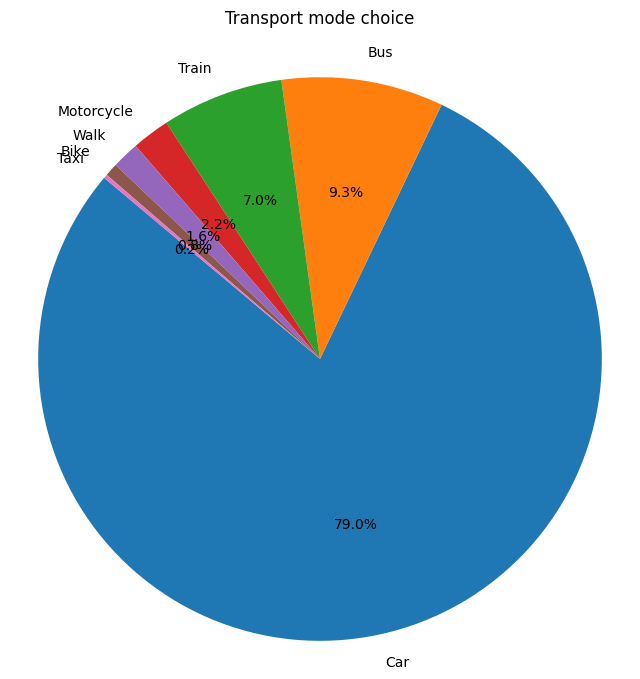

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df
# y la columna con los nombres es "Nombres"

# Primero, cuentas la cantidad de filas para cada nombre
conteo_nombres = trips['Modo'].value_counts()

# Luego, creas un gráfico de quesos (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(conteo_nombres, labels=conteo_nombres.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse

# Puedes añadir un título si lo deseas
plt.title('Transport mode choice', pad=20)

# Muestra el gráfico
plt.show()

In [ ]:
walk = trips[trips['Modo'] == 'Walk']
walk

,Prov_Ori,Prov_Des,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Act_Ori,Act_Des,Proposito,Modo,...,Motos,Tipo_familia,Sexo,Edad,Actividad,crnt_tur,crnt_mot,crnt_otr,Año,Income
45,20,20,Donostialdea,Donostialdea,Lasarte-Oria,Usurbil,Residencia Habitual,Trabajo habitual,Trabajo,Walk,...,1,2 adultos con niño(s),2,3,4,2,2,2,2021,0.000
176,20,20,Donostialdea,Donostialdea,Lasarte-Oria,Usurbil,Residencia Habitual,Trabajo habitual,Trabajo,Walk,...,1,2 adultos con niño(s),2,3,4,2,2,2,2021,0.000
221,20,20,Bidasoa,Bidasoa,Irun,Hondarribia,Trabajo habitual,Residencia Habitual,Trabajo,Walk,...,2,Otros hogares sin niños,2,3,1,1,1,2,2021,22325.485
242,20,20,Bidasoa,Bidasoa,Irun,Hondarribia,Trabajo habitual,Residencia Habitual,Trabajo,Walk,...,2,Otros hogares sin niños,2,3,1,1,1,2,2021,22325.485
249,20,20,Goierri,Goierri,Ordizia,Beasain,Residencia Habitual,Trabajo habitual,Trabajo,Walk,...,1,Hogar de una persona,2,3,1,2,2,2,2021,19659.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563142,20,20,Urola Kosta,Urola Kosta,Azpeitia,Azkoitia,Residencia Habitual,Trabajo habitual,Trabajo,Walk,...,1,2 adultos con niño(s),2,5,1,1,2,2,2016,25923.060
563150,20,20,Donostialdea,Donostialdea,Errenteria,Donostia/San Sebastian,Trabajo habitual,Residencia Habitual,Trabajo,Walk,...,1,2 adultos con niño(s),2,2,4,2,2,2,2011,0.000
563249,20,20,Bidasoa,Bidasoa,Irun,Hondarribia,Trabajo habitual,Residencia Habitual,Trabajo,Walk,...,2,Otros hogares con niños,2,5,1,1,2,2,2016,22090.220
563251,20,20,Urola Kosta,Urola Kosta,Azpeitia,Azkoitia,Residencia Habitual,Trabajo habitual,Trabajo,Walk,...,1,2 adultos con niño(s),2,5,1,2,2,2,2016,20625.300
